In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from keras.utils import np_utils
import keras
from keras.layers import Activation,Dropout,BatchNormalization,Dense
from keras.models import Sequential
from keras.optimizers import SGD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import PolynomialFeatures



# PROBLEM STATEMENT

## Term Deposit Subscription Prediction
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

# EXPLORATORY DATA ANALYSIS

In [5]:
data = pd.read_csv('/home/shamanth/Downloads/train.csv')
data.head()
data.shape

(32978, 22)

In [6]:
data.shape

(32978, 22)

In [7]:
data.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,45,services,married,basic.9y,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### for now let's drop the id column

In [8]:
data = data.drop('id',axis=1)

In [9]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32978 entries, 0 to 32977
Data columns (total 21 columns):
age               32978 non-null int64
job               32978 non-null object
marital           32978 non-null object
education         32978 non-null object
default           32978 non-null object
housing           32978 non-null object
loan              32978 non-null object
contact           32978 non-null object
month             32978 non-null object
day_of_week       32978 non-null object
duration          32978 non-null int64
campaign          32978 non-null int64
pdays             32978 non-null int64
previous          32978 non-null int64
poutcome          32978 non-null object
emp.var.rate      32978 non-null float64
cons.price.idx    32978 non-null float64
cons.conf.idx     32978 non-null float64
euribor3m         32978 non-null float64
nr.employed       32978 non-null float64
y                 32978 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [11]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Let's see the type of fields each categorical couln has

In [12]:
print('Job:\n',data['job'].unique())

Job:
 ['housemaid' 'services' 'blue-collar' 'technician' 'retired' 'management'
 'self-employed' 'admin.' 'unknown' 'entrepreneur' 'unemployed' 'student']


In [13]:
print('Marital:\n',data['marital'].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']


In [14]:
print('Education:\n',data['education'].unique())

Education:
 ['basic.4y' 'high.school' 'basic.9y' 'unknown' 'professional.course'
 'basic.6y' 'university.degree' 'illiterate']


In [15]:
print('Default:\n',data['default'].unique())

Default:
 ['no' 'unknown' 'yes']


In [16]:
print('Housing:\n',data['housing'].unique())

Housing:
 ['no' 'yes' 'unknown']


In [17]:
print('Loan:\n',data['loan'].unique())

Loan:
 ['no' 'yes' 'unknown']


In [18]:
data = data.drop('duration',axis=1)

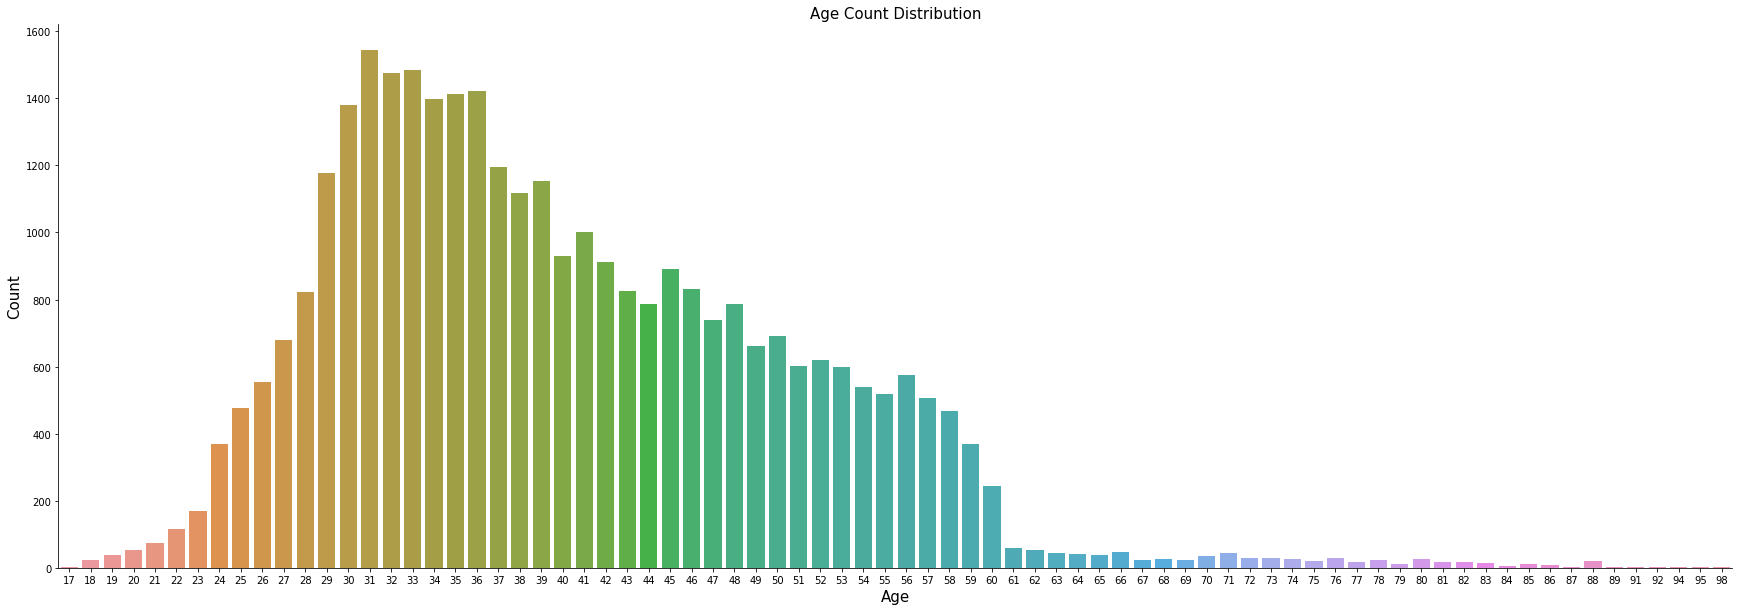

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
sns.countplot(x = 'age', data = data)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

In [29]:
print(data.age.value_counts()/data.age.count())

31    0.046819
33    0.045060
32    0.044757
36    0.043089
35    0.042847
34    0.042362
30    0.041876
37    0.036267
29    0.035660
39    0.035023
38    0.033932
41    0.030384
40    0.028201
42    0.027624
45    0.026988
46    0.025168
43    0.025017
28    0.024986
44    0.023895
48    0.023834
47    0.022379
50    0.020953
27    0.020559
49    0.020074
52    0.018770
51    0.018285
53    0.018194
56    0.017406
26    0.016799
54    0.016344
        ...   
65    0.001152
70    0.001031
76    0.000879
72    0.000879
73    0.000879
68    0.000788
74    0.000788
80    0.000758
78    0.000728
67    0.000728
69    0.000728
18    0.000667
75    0.000606
88    0.000606
77    0.000546
82    0.000515
81    0.000485
83    0.000425
85    0.000334
79    0.000334
86    0.000243
84    0.000182
98    0.000061
17    0.000061
89    0.000061
91    0.000061
87    0.000030
92    0.000030
94    0.000030
95    0.000030
Name: age, Length: 78, dtype: float64


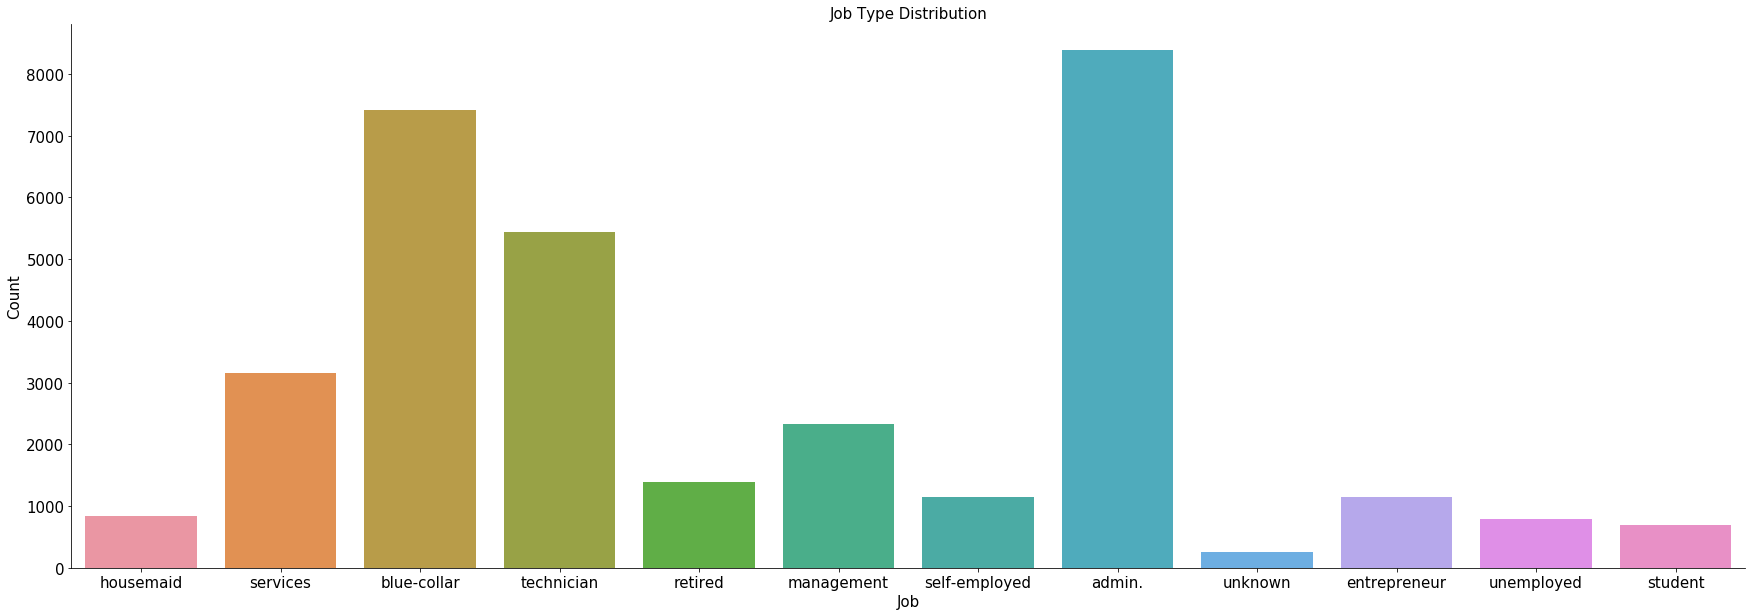

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
sns.countplot(x = 'job', data = data)
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Type Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [30]:
print(data.job.value_counts()/data.job.count())

admin.           0.254230
blue-collar      0.224877
technician       0.164777
services         0.095640
management       0.070774
retired          0.042210
entrepreneur     0.034902
self-employed    0.034538
housemaid        0.025320
unemployed       0.023925
student          0.020984
unknown          0.007823
Name: job, dtype: float64


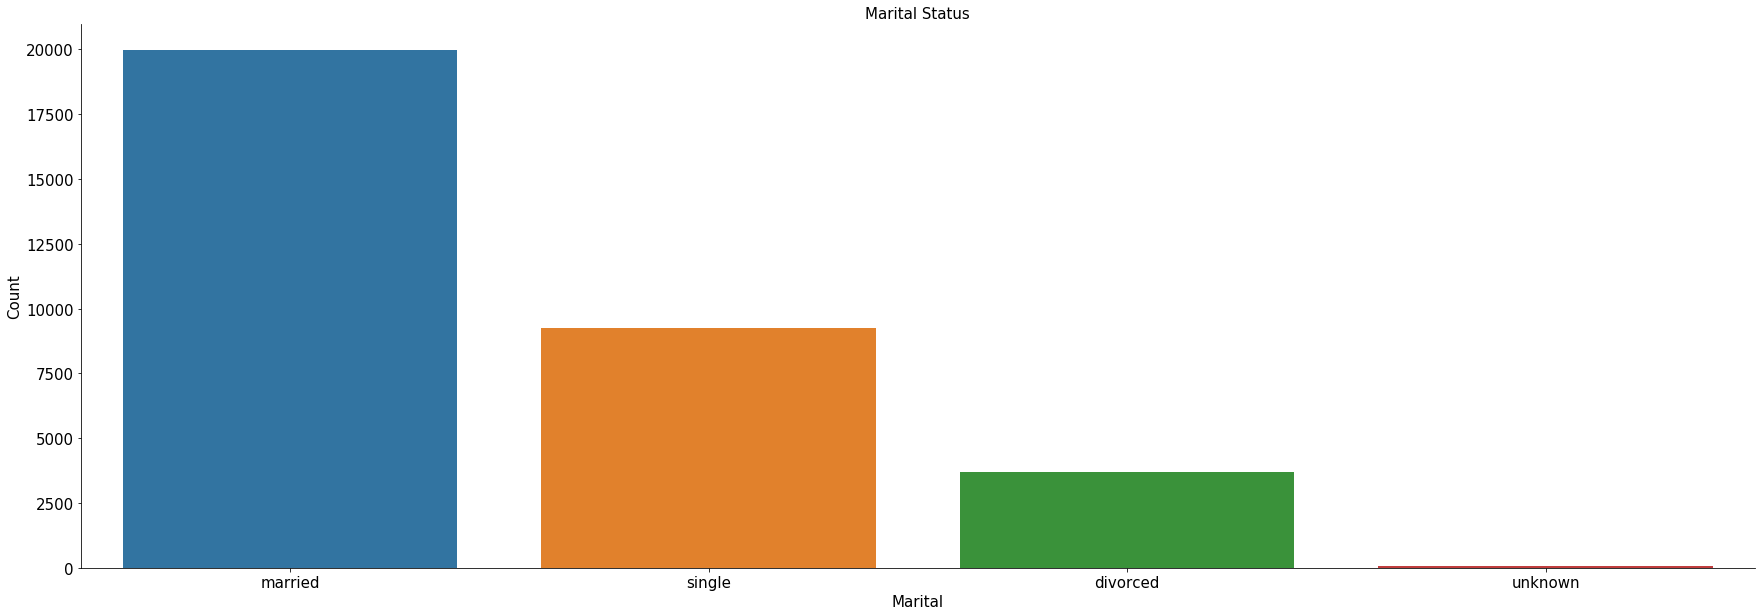

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
sns.countplot(x = 'marital', data = data)
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Status', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [31]:
print(data.marital.value_counts()/data.marital.count())

married     0.605616
single      0.280460
divorced    0.112014
unknown     0.001910
Name: marital, dtype: float64


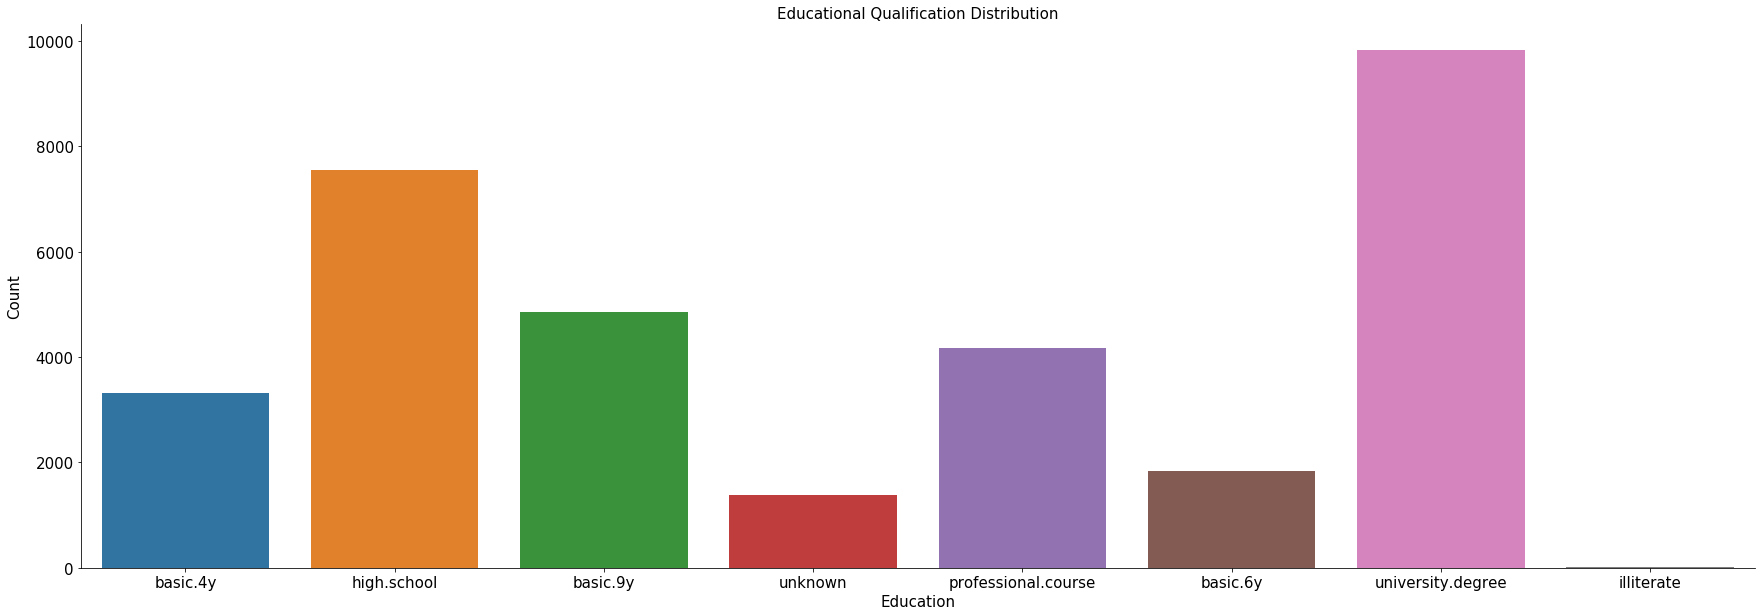

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
sns.countplot(x = 'education', data = data)
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Educational Qualification Distribution', fontsize=15)
ax.tick_params(labelsize=15)
sns.despine()

In [32]:
print(data.education.value_counts()/data.education.count())

university.degree      0.297987
high.school            0.228759
basic.9y               0.147432
professional.course    0.126751
basic.4y               0.100734
basic.6y               0.055946
unknown                0.041937
illiterate             0.000455
Name: education, dtype: float64


no         0.789708
unknown    0.210201
yes        0.000091
Name: default, dtype: float64 

yes        0.523137
no         0.452938
unknown    0.023925
Name: housing, dtype: float64 

no         0.824004
yes        0.152071
unknown    0.023925
Name: loan, dtype: float64


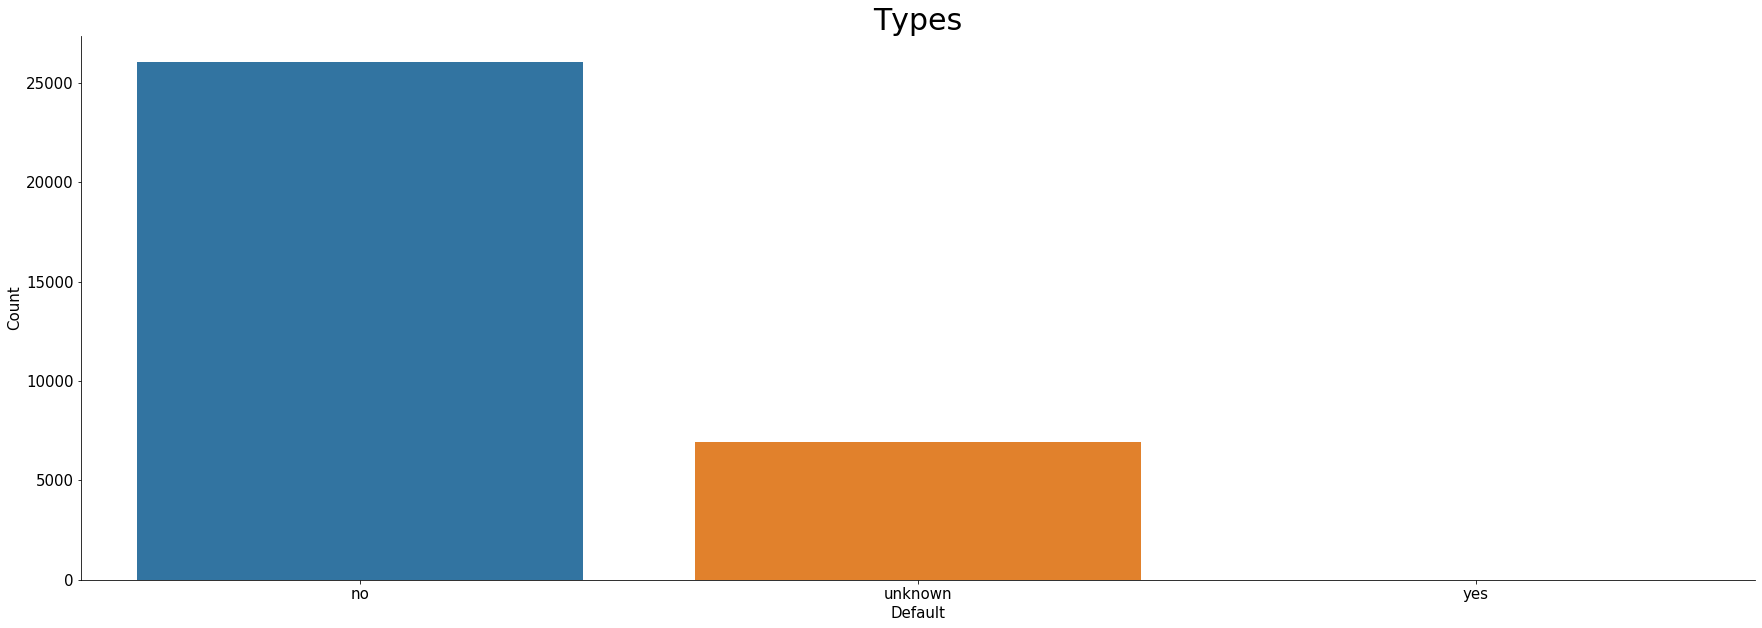

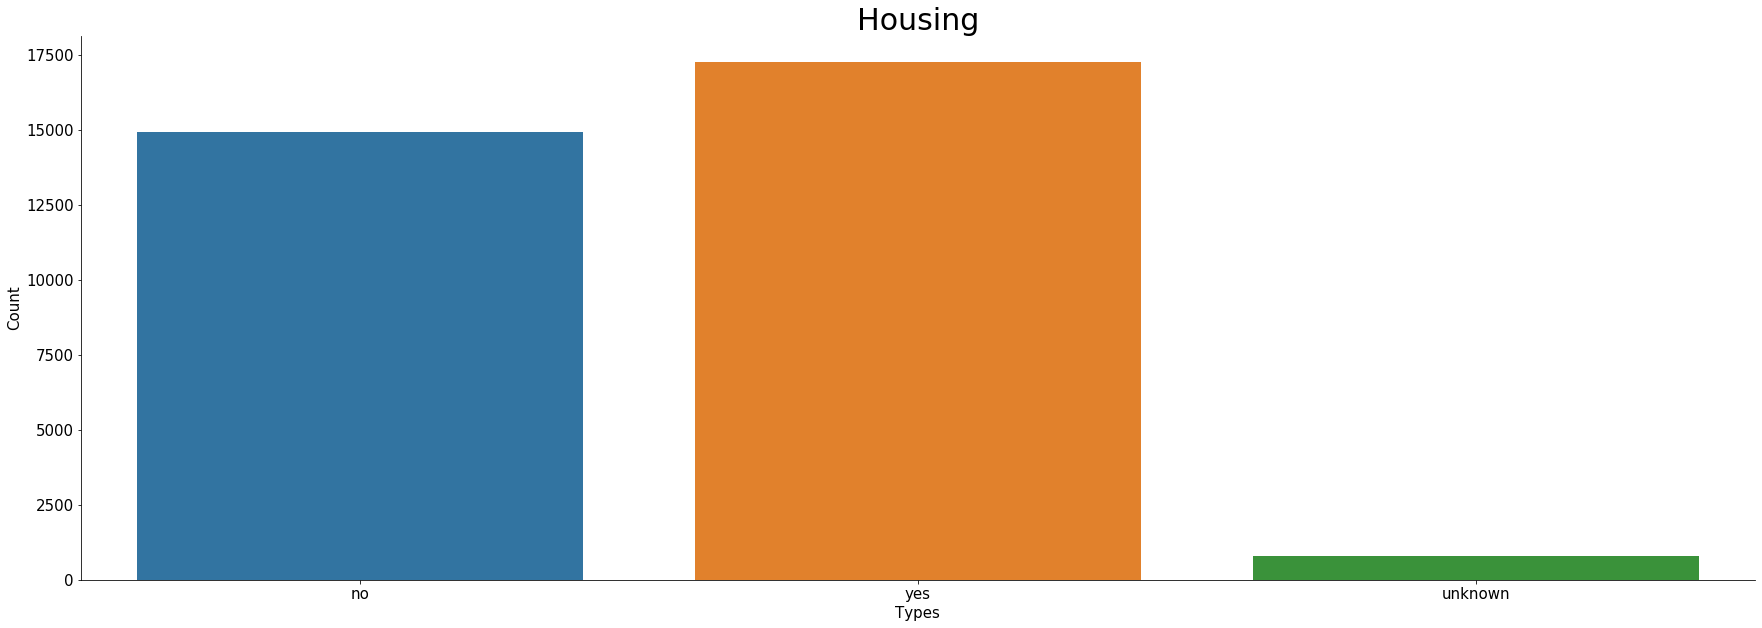

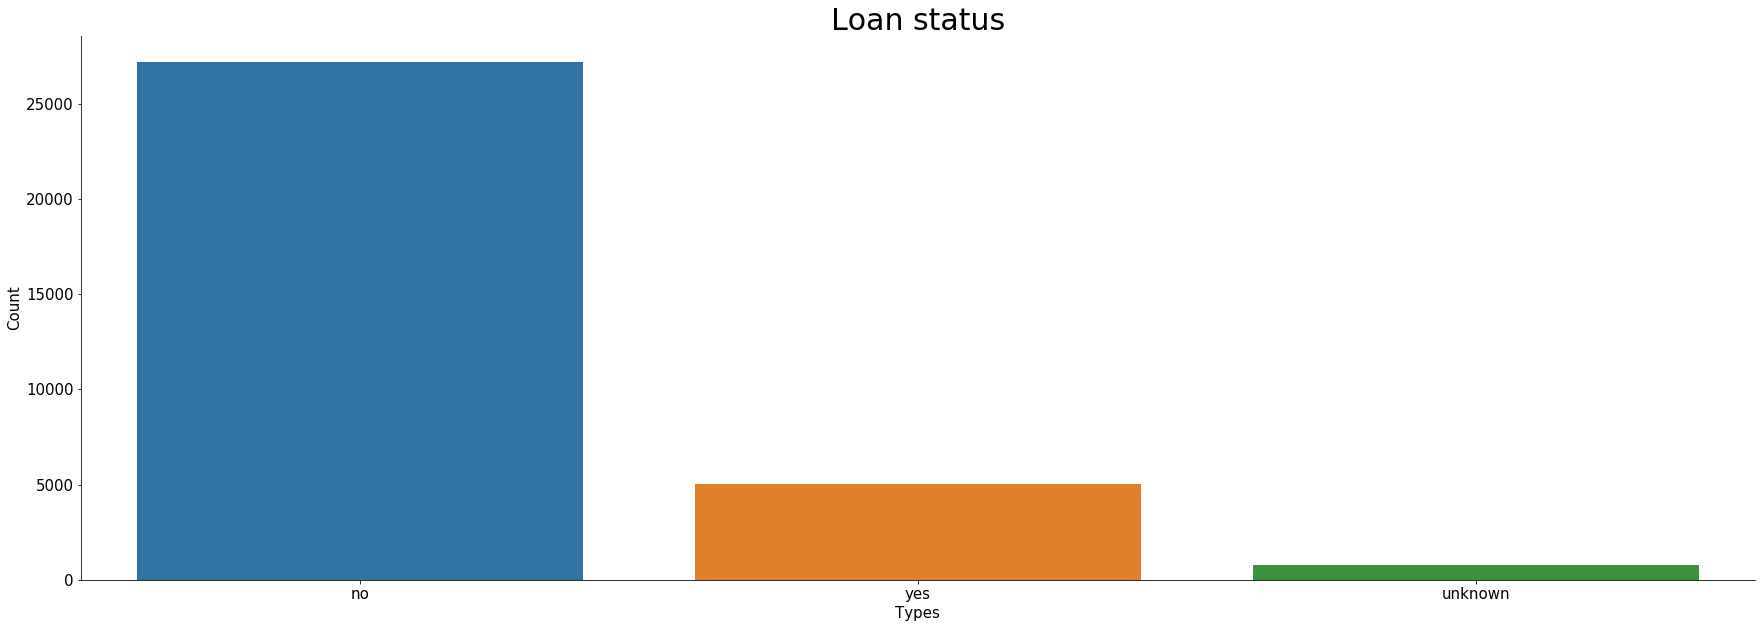

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
sns.countplot(x = 'default', data = data)
ax.set_xlabel('Default', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Types',fontsize=30)
ax.tick_params(labelsize=15)
sns.despine()
print(data.default.value_counts()/data.default.count(),"\n")

fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
sns.countplot(x = 'housing', data = data)
ax.set_xlabel('Types', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Housing',fontsize=30)
ax.tick_params(labelsize=15)
sns.despine()
print(data.housing.value_counts()/data.housing.count(),"\n")

fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
sns.countplot(x = 'loan', data = data)
ax.set_xlabel('Types', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Loan status', fontsize=30)
ax.tick_params(labelsize=15)
sns.despine()
print(data.loan.value_counts()/data.loan.count())

In [36]:
def check( df):
    for name in df.columns:
        print ("==========")
        print (df[ name].dtype)
        if df[ name].dtype is np.dtype( 'O'):
            print (df[ name].value_counts())
            print ("Name: ", name)
        else:
            print (df[ name].describe())

check(data)

int64
count    32978.000000
mean        40.042392
std         10.466038
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64
object
admin.           8384
blue-collar      7416
technician       5434
services         3154
management       2334
retired          1392
entrepreneur     1151
self-employed    1139
housemaid         835
unemployed        789
student           692
unknown           258
Name: job, dtype: int64
Name:  job
object
married     19972
single       9249
divorced     3694
unknown        63
Name: marital, dtype: int64
Name:  marital
object
university.degree      9827
high.school            7544
basic.9y               4862
professional.course    4180
basic.4y               3322
basic.6y               1845
unknown                1383
illiterate               15
Name: education, dtype: int64
Name:  education
object
no         26043
unknown     6932
yes            3
Name: default, dtype: int64


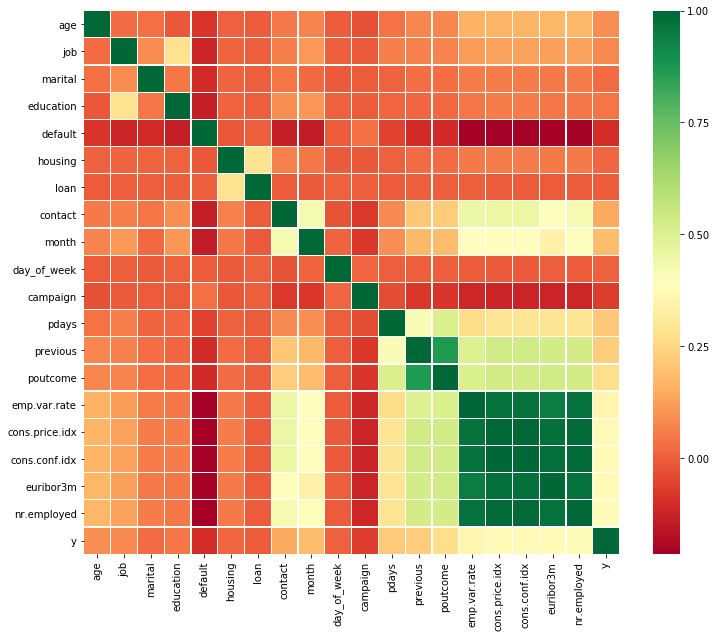

In [37]:
plt.figure(figsize=(12,10))
corr=data.apply(lambda x:pd.factorize(x)[0]).corr()
ax=sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidth=.2,cmap='RdYlGn')

We can see that we cant infer more from this matrix ,thus we'll need to process the data properly before assessing the correlation

##### Let's see the distribution of number of yes's and no's

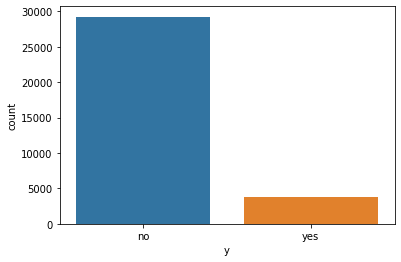

In [38]:
sns.countplot(x='y',data=data)

### Since the data is skewed we will sample the data and duplicate the number of yes's

In [39]:
d1=data.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
data=d1

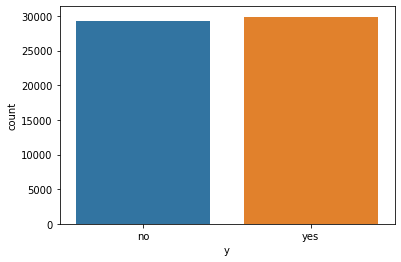

In [40]:
sns.countplot(x='y',data=data)

#### Now we see that our data is balanced

# Visualization of Numerical Columns

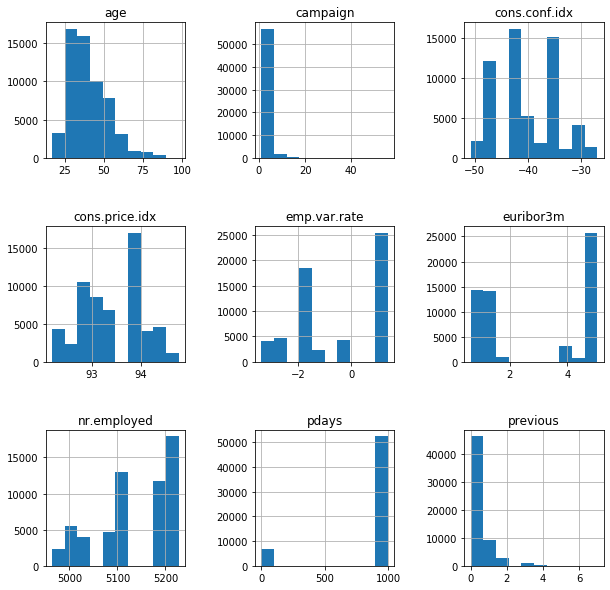

In [41]:
header = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
data.hist(column=header,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

In [42]:

def function (row):
    if(row['pdays']==999):
        return 0;
    return 1;
data['pdays2']=data.apply(lambda row: function(row),axis=1)

def function1 (row):
    if(row['pdays']==999):
        return 30;
    return row['pdays'];
data['pdays']=data.apply(lambda row: function1(row),axis=1)

data['pdays']=data['pdays'].astype(int)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,56,services,married,high.school,no,no,yes,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


### Standardizing the train data

In [43]:
idx_numeric=[0,10,11,12,14,15,16,17,18]
scaler = MinMaxScaler()
data[data.columns[idx_numeric]] = scaler.fit_transform(data[data.columns[idx_numeric]])

In [44]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
0,0.481481,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,0
1,0.493827,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,0
2,0.246914,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,0
3,0.481481,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,0
4,0.345679,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735,no,0


### We will Label encode the train data so that all categorical columns are converted into numerical values

In [45]:
le = preprocessing.LabelEncoder()
data.job = le.fit_transform(data.job)
data.marital = le.fit_transform(data.marital)
data.education = le.fit_transform(data.education)
data.default = le.fit_transform(data.default)
data.housing = le.fit_transform(data.housing)
data.loan = le.fit_transform(data.loan)
data.contact = le.fit_transform(data.contact)
data.month = le.fit_transform(data.month)
data.day_of_week = le.fit_transform(data.day_of_week)
data.poutcome = le.fit_transform(data.poutcome)
data.y = le.fit_transform(data.y)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
0,0.481481,3,1,0,0,0,0,1,6,1,...,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,0
1,0.493827,7,1,3,1,0,0,1,6,1,...,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,0
2,0.246914,7,1,3,0,2,0,1,6,1,...,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,0
3,0.481481,7,1,3,0,0,2,1,6,1,...,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,0
4,0.345679,7,1,2,1,0,0,1,6,1,...,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,0


In [46]:
data.shape

(59137, 21)

In [47]:
data.to_csv(r"/home/shamanth/Downloads/train_le.csv", index=False)

y             0         1
month                    
0      0.028781  0.060199
1      0.074742  0.072104
2      0.001319  0.009875
3      0.088303  0.070751
4      0.064427  0.060470
5      0.003822  0.029897
6      0.173428  0.094019
7      0.049969  0.044642
8      0.005445  0.034902
9      0.004227  0.028679


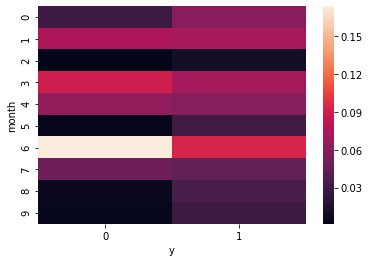

In [48]:
res = pd.crosstab( data[ "month"], data[ "y"]).apply(lambda r: r/len(data))
print (res)

sns.heatmap(res)

#### The months May,June,July,August and November have majority of people opting for a no

y               0         1
contact                    
0        0.301808  0.419365
1        0.192654  0.086173


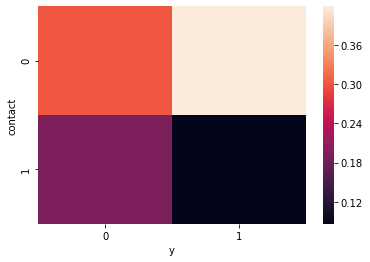

In [49]:
res2 = pd.crosstab( data[ "contact"], data[ "y"]).apply(lambda r: r/len(data))
print (res2)

sns.heatmap(res2)

#### We see that both modes of communication have higher share of people opting for a no

# TEST DATA PROCESSING

#### We will be perfroming the same kind of processing we did on train data as to the test data

In [50]:
data2 = pd.read_csv( '/home/shamanth/Downloads/test.csv')
data2 = data2.drop('duration',axis=1)
data2.head()

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,11,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,13,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [51]:
data2.shape

(8210, 20)

In [52]:
data2 = data2.drop('id',axis=1)
data2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


Splitting Pdays into 2 features

In [53]:

def function (row):
    if(row['pdays']==999):
        return 0;
    return 1;
data2['pdays2']=data2.apply(lambda row: function(row),axis=1)

def function1 (row):
    if(row['pdays']==999):
        return 30;
    return row['pdays'];
data2['pdays']=data2.apply(lambda row: function1(row),axis=1)
data2['pdays']=data2['pdays'].astype(int)
data2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays2
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,25,services,single,high.school,no,yes,no,telephone,may,mon,1,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,1,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [54]:
data2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays2
0,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,25,services,single,high.school,no,yes,no,telephone,may,mon,1,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,1,30,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [55]:
data2.shape

(8210, 20)

In [56]:
idx_numeric=[0,10,11,12,14,15,16,17]
scaler = MinMaxScaler()
data2[data.columns[idx_numeric]] = scaler.fit_transform(data2[data2.columns[idx_numeric]])

In [57]:
data2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays2
0,0.306667,admin.,married,basic.6y,no,no,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,5191.0,0
1,0.560000,admin.,married,professional.course,no,no,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,5191.0,0
2,0.320000,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,5191.0,0
3,0.106667,services,single,high.school,no,yes,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,5191.0,0
4,0.533333,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,5191.0,0


In [58]:
le2 = preprocessing.LabelEncoder()
data2.job = le2.fit_transform(data2.job)
data2.marital = le2.fit_transform(data2.marital)
data2.education = le2.fit_transform(data2.education)
data2.default = le2.fit_transform(data2.default)
data2.housing = le2.fit_transform(data2.housing)
data2.loan = le2.fit_transform(data2.loan)
data2.contact = le2.fit_transform(data2.contact)
data2.month = le2.fit_transform(data2.month)
data2.day_of_week = le2.fit_transform(data2.day_of_week)
data2.poutcome = le2.fit_transform(data2.poutcome)
data2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays2
0,0.306667,0,1,1,0,0,0,1,6,1,0.0,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,5191.0,0
1,0.560000,0,1,5,0,0,0,1,6,1,0.0,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,5191.0,0
2,0.320000,1,1,7,1,0,0,1,6,1,0.0,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,5191.0,0
3,0.106667,7,2,3,0,2,0,1,6,1,0.0,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,5191.0,0
4,0.533333,3,0,0,0,2,0,1,6,1,0.0,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,5191.0,0


In [59]:
data2.shape

(8210, 20)

In [60]:
data2.to_csv(r"/home/shamanth/Downloads/test_le.csv", index=False)

# APPLYING PCA 

In [61]:
train_le = pd.read_csv('/home/shamanth/Downloads/train_le.csv')
train_le.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
0,0.481481,3,1,0,0,0,0,1,6,1,...,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,0
1,0.493827,7,1,3,1,0,0,1,6,1,...,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,0
2,0.246914,7,1,3,0,2,0,1,6,1,...,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,0
3,0.481481,7,1,3,0,0,2,1,6,1,...,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,0
4,0.345679,7,1,2,1,0,0,1,6,1,...,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,0.859735,0,0


In [62]:
X = train_le.drop('y', axis=1).values
y = train_le['y'].values

In [63]:
pca = PCA(n_components=0.8)
x_pca = pca.fit_transform(X)
X.shape, x_pca.shape

((59137, 20), (59137, 3))

We see that on applying PCA only 3 label encoded features are important

# Multi Layer Perceptron

In [64]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_ytrain = encoder.transform(y)                    #use to convert y to required format
labels_train = np_utils.to_categorical(encoded_ytrain, 2)

#### We wil use 2 neurons on Output Dense layer.Accordingly we will be starting with 28 neurons in the input layers and then will increase them to see which will be giving a better score.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, input_dim=20, kernel_initializer="he_normal")`
  after removing the cwd from sys.path.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 256)               5376      
_________________________________________________________________
batch_normalization_40 (Batc (None, 256)               1024      
_________________________________________________________________
activation_40 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_41 (Batc (None, 256)               1024      
_________________________________________________________________
activation_41 (Activation)   (None, 256)               0         
__________

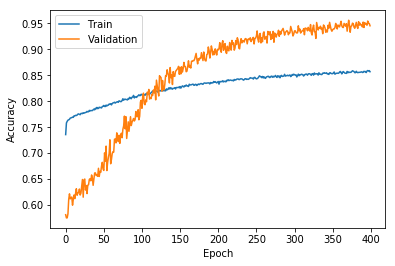

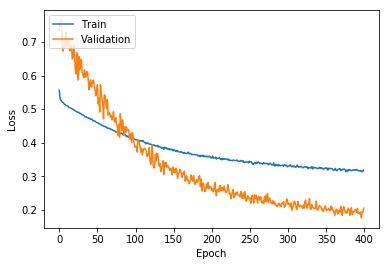

NameError: name 'xtest' is not defined

In [52]:


model = Sequential()
model.add(Dense(256, input_dim=20, init="he_normal"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
   
model.add(Dense(256, kernel_initializer="he_normal"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
   
#model.add(Dense(32, kernel_initializer="he_normal"))
#model.add(BatchNormalization())
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
   
#   model.add(Dense(4096, kernel_initializer="he_normal"))
#   model.add(BatchNormalization())
#   model.add(Activation('relu'))
#   model.add(Dropout(0.4))
#   
model.add(Dense(2))
model.add(BatchNormalization())
model.add(Activation("softmax"))
sgd = SGD(lr=0.0001)
adam=keras.optimizers.Adam(lr=0.001)
model.compile(loss="binary_crossentropy", optimizer=adam,metrics=["accuracy"])
model.summary()
history=model.fit(X, labels_train, epochs=400, batch_size=100, 	verbose=1,validation_split=0.2)
   
  
fig=plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
#plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
fig.savefig("Filterbank_accuracy_my.png")
# summarize history for loss
fig=plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
fig.savefig("Filterbank_loss_my.png")
   
(loss, accuracy) = model.evaluate(xtest, labels_test, batch_size=128, verbose=1)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,	accuracy * 100))

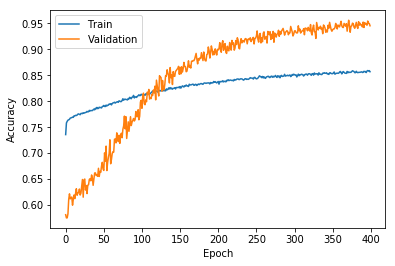

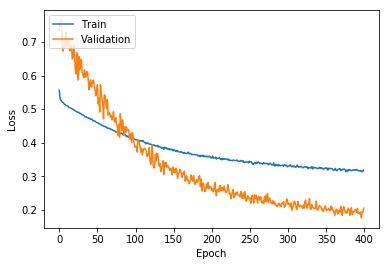

NameError: name 'xtest' is not defined

In [53]:
fig=plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
#plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
fig.savefig("Filterbank_accuracy_my.png")
# summarize history for loss
fig=plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
fig.savefig("Filterbank_loss_my.png")
   
(loss, accuracy) = model.evaluate(xtest, labels_test, batch_size=128, verbose=1)
print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,	accuracy * 100))

## MLP gave a validation accuracy of 0.9452 (256 neurons)

In [65]:
test_le = pd.read_csv('/home/shamanth/Downloads/test_le.csv')
test_le.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays2
0,0.306667,0,1,1,0,0,0,1,6,1,0.0,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,5191.0,0
1,0.560000,0,1,5,0,0,0,1,6,1,0.0,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,5191.0,0
2,0.320000,1,1,7,1,0,0,1,6,1,0.0,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,5191.0,0
3,0.106667,7,2,3,0,2,0,1,6,1,0.0,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,5191.0,0
4,0.533333,3,0,0,0,2,0,1,6,1,0.0,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,5191.0,0


In [66]:
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# APPLYING PCA FOR TEST DATA

In [67]:
test_le2 = pd.read_csv('/home/shamanth/Downloads/test_le.csv')
test_le2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays2
0,0.306667,0,1,1,0,0,0,1,6,1,0.0,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,5191.0,0
1,0.560000,0,1,5,0,0,0,1,6,1,0.0,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,5191.0,0
2,0.320000,1,1,7,1,0,0,1,6,1,0.0,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,5191.0,0
3,0.106667,7,2,3,0,2,0,1,6,1,0.0,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,5191.0,0
4,0.533333,3,0,0,0,2,0,1,6,1,0.0,1.0,0.0,1,0.9375,0.698753,0.60251,0.957379,5191.0,0


In [68]:
X2=test_le2

In [69]:
pca2 = PCA(n_components=0.8)
x_pca2 = pca2.fit_transform(X2)
X2.shape, x_pca2.shape

((8210, 20), (8210, 1))

We see here that after processing test data and applying PCA it gives only one important feature which is absurd,So we will not be using the pca transformed features for prediction

# MODELLING APPROACHES

# RANDOM FOREST

In [70]:
rfc = RandomForestClassifier(n_estimators=107)
rfc.fit(X, y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=107,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
predict_test=rfc.predict(test_le)

In [72]:
pred=predict_test

In [73]:
data3 = pd.read_csv('/home/shamanth/Downloads/test.csv')
data3 = data3.drop('duration',axis=1)
data3.head()

,id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,11,25,services,single,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,13,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [74]:
data3['id'][3]

11

In [75]:
data4=data3['id']
    

In [76]:
data4.head()

0     3
1     6
2    10
3    11
4    13
Name: id, dtype: int64

In [77]:
pred2=pred.T

In [78]:
pred2

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
data42=pd.DataFrame(data=data4)

In [80]:
data42.head()

,id
0,3
1,6
2,10
3,11
4,13


In [81]:
data42.insert(1,'y',pred2)

In [82]:
data42.head()

,id,y
0,3,0
1,6,0
2,10,0
3,11,0
4,13,0


In [83]:
data42['y'].replace([0,1],['no','yes'],inplace=True)

In [84]:
data42.head()

,id,y
0,3,no
1,6,no
2,10,no
3,11,no
4,13,no


In [85]:
data42.to_csv(r"/home/shamanth/Downloads/subm7.csv", index=False)

In [86]:
data42.shape

(8210, 2)

# Other Modelling Approaches

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier


In [88]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Gradient Booster',GradientBoostingClassifier()))

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
seed=7

In [90]:
results_c = []
names_c = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)    
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/home/shamanth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/shamanth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/shamanth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/shamanth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/shamanth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

Logistic Regression: 0.514472 (0.142736)
KNN: 0.668921 (0.300836)
Decision Tree: 0.578914 (0.376433)
Naive Bayes: 0.661951 (0.231138)
Gradient Booster: 0.410516 (0.215225)


### We Analyse the cross validation Scores(highest 3) of the above models with better tuning(since cv scores above are really low) and thus check our F1 score

In [91]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [92]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
kcv = (cross_val_score(knn, X, y, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(kcv)

0.9491013449956164


### We see that using KNN with 1 neighbour gives us a cv score of 0.95

Let's now predict using this model

In [93]:
predict_knn=knn.predict(test_le)

In [94]:
data_dup=pd.read_csv('/home/shamanth/Downloads/test.csv')

In [95]:
data_dup=data_dup['id']

In [96]:
data_dup=pd.DataFrame(data=data_dup)
data_dup.insert(1,'y',predict_knn)
data_dup['y'].replace([0,1],['no','yes'],inplace=True)
data_dup.head()



,id,y
0,3,no
1,6,no
2,10,no
3,11,no
4,13,no


In [117]:
data_dup.to_csv(r"/home/shamanth/Downloads/main8.csv", index=False)

### Let's Test using Logistc Regression

In [98]:
poly_features_3 = PolynomialFeatures(degree=3)
X_train=poly_features_3.fit_transform(X)
lr = LogisticRegression()
lr.fit(X, y)
lcv = (cross_val_score(lr, X, y, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(lcv)

/home/shamanth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/shamanth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/shamanth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/shamanth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/shamanth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

0.735884738012419


### Logistic Regression gives us a cv score of nearly 0.73

Let's predict using this model

In [99]:
data_dup2=pd.read_csv('/home/shamanth/Downloads/test.csv')
data_dup2=data_dup2['id']

predict_lr=lr.predict(test_le)

data_dup2=pd.DataFrame(data=data_dup2)
data_dup2.insert(1,'y',predict_lr)
data_dup2['y'].replace([0,1],['no','yes'],inplace=True)
data_dup2.head()

,id,y
0,3,no
1,6,no
2,10,no
3,11,no
4,13,no


In [118]:
data_dup2.to_csv(r"/home/shamanth/Downloads/sp.csv", index=False)

### Random Forest Classifier

In [101]:
rfc2= RandomForestClassifier(n_estimators = 280)
rfc2.fit(X, y)
RFCCV = (cross_val_score(rfc2, X, y, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print(RFCCV)

0.9701033890064485


### Random Forest Classifier gives us a high cv score of around 0.97

Predicting using this model

In [107]:
data_dup3=pd.read_csv('/home/shamanth/Downloads/test.csv')
data_dup3=data_dup3['id']

predict_rfc=rfc2.predict(test_le)

data_dup3=pd.DataFrame(data=data_dup3)
data_dup3.insert(1,'y',predict_rfc)
data_dup3['y'].replace([0,1],['no','yes'],inplace=True)
data_dup3.head()


,id,y
0,3,no
1,6,no
2,10,no
3,11,no
4,13,no


In [103]:
from yellowbrick.model_selection import LearningCurve

/home/shamanth/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/shamanth/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/shamanth/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


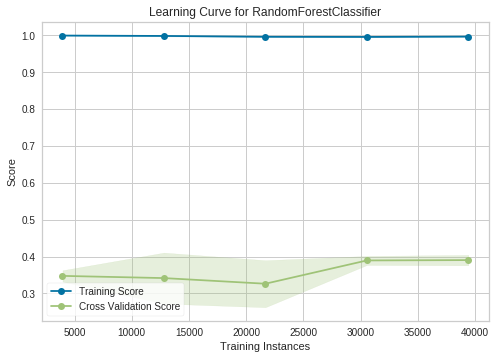

In [104]:
visualizer=LearningCurve(rfc2,scoring='f1_weighted')
visualizer.fit(X,y)
visualizer.poof()

In [86]:
data_dup3.to_csv(r"/home/shamanth/Downloads/Main_21.csv", index=False)

In [114]:
# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_clf.fit(X,y)
grad_scores = cross_val_score(grad_clf, X, y)
grad_mean = grad_scores.mean()
print(grad_mean)

/home/shamanth/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.9078657


### Gradient Booster gives us a cv score of 0.9

In [115]:
data_dup4=pd.read_csv('/home/shamanth/Downloads/test.csv')
data_dup4=data_dup4['id']

predict_gb=grad_clf.predict(test_le)

data_dup4=pd.DataFrame(data=data_dup4)
data_dup4.insert(1,'y',predict_gb)
data_dup4['y'].replace([0,1],['no','yes'],inplace=True)
data_dup4.head()


,id,y
0,3,no
1,6,no
2,10,no
3,11,no
4,13,no


In [116]:
data_dup4.to_csv(r"/home/shamanth/Downloads/subm_5.csv", index=False)

# Results and Analysis

## As per the f1 score obtained ,I have ranked the models as below:

These are the max scores after tuning the model multiple times

#### 1. Random Forest Classifier  : 0.97888

#### 2. K nearest Neighbours:  0.93869

#### 3. Logistic Regression:  0.85830

#### 4. Gradient Boost :  0.90133

#### 5. Multi Layer Perceptron: 0.900418

### As per the above table Random forest Classifier is the best model to predict the outcome